# Ex 2 Analisi multivariata 
## Dataset a più variabili


### Analisi dataset
* Prima colonna indica la dimensione della casa
* Seconda colonna indica il numero di bagni
* Terza colonna indica il prezzo
    * Questa sarà la feature di output

In [1]:
import numpy as np
from matplotlib import pyplot as plt

data = np.loadtxt('data/ex1data2.txt', delimiter = ',')
print("Dataset size : ", data.shape)

Dataset size :  (47, 3)


Format formatta il testo all'interno del print

In [2]:
x = data[:, :2]
y = data[:, -1]

# set m x 1 matrix
y = np.reshape(y, (y.shape[0],1))

m = x.shape[0]
print("Training examples: {}".format(m))

n = x.shape[1]
print("Features: {}".format(n))

print("10 examples: \n", x[:10, :])



Training examples: 47
Features: 2
10 examples: 
 [[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]
 [1.985e+03 4.000e+00]
 [1.534e+03 3.000e+00]
 [1.427e+03 3.000e+00]
 [1.380e+03 3.000e+00]
 [1.494e+03 3.000e+00]]


### Notes
Ci conviene salvare la media e deviazione standard o massimo e minimo per poter poi scalare i nuovi valori per le predizioni.

La normalizzazione agisce sull'input.

Dopo aver inizializzato a zero i vari vettori di buffer passiamo al calcolo:
* In $\mu$ viene inserita la media delle x
* In $\sigma$ viene calcolata la deviazione standard
* Infine viene calcolata la normalizzazione sottraendo ad x la media e diviso il tutto per la deviazione standard

In [3]:
def featureNormalize(x):
    x_norm = x
    
    mu = np.zeros((1, x.shape[1]))
    sigma = np.zeros((1, x.shape[1]))
    
    mu = np.mean(x, axis = 0)
    sigma = np.std(x, axis = 0)
    
    for i in range(x.shape[1]):
        x_norm[:, i] = (x[:, i] - mu[i]) / sigma[i]
        
    return x_norm, mu, sigma

In [4]:
x_norm, mu, sigma = featureNormalize(x)
print("X normalized: {}".format(x[:10, :]))
print("Mean: {}".format(m))
print("Deviazione standard: {}".format(sigma))

X normalized: [[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]
 [-0.01994505  1.10220517]
 [-0.59358852 -0.22609337]
 [-0.72968575 -0.22609337]
 [-0.78946678 -0.22609337]
 [-0.64446599 -0.22609337]]
Mean: 47
Deviazione standard: [7.86202619e+02 7.52842809e-01]


In [5]:
x_norm = np.concatenate([np.ones((m,1)), x_norm], axis = 1)
print(x_norm.shape)

(47, 3)


In [6]:
def compute_cost_vectorized(x, y, theta):
    h = x.dot(theta)
    J = (h-y).T.dot(h-y)
    return J/(2*m)

In [7]:
def gradient_descent_vectorized(x, y, theta = [[0], [0], [0]], alpha = 0.001, num_iters= 400):
    J_history = np.zeros((num_iters))
    for k in range(num_iters):
        #print(k)
        h = x.dot(theta)
        theta = theta - (alpha/m)*(x.T.dot(h-y))
        #print(theta)
        J_history[k] = compute_cost_vectorized(x, y, theta)
    return theta, J_history

In [8]:
print("runnung gradient")
alpha = 0.01
num_iters = 2000
theta = np.zeros((3, 1))
#theta = np.array([1,0,2])
print(m)
theta_norm, j_history_norm = gradient_descent_vectorized(x_norm, y, theta, alpha, num_iters)
x_copy = np.concatenate([np.ones((m,1)), x], axis = 1)
theta, j_history = gradient_descent_vectorized(x_copy, y, theta, alpha, num_iters)

runnung gradient
47


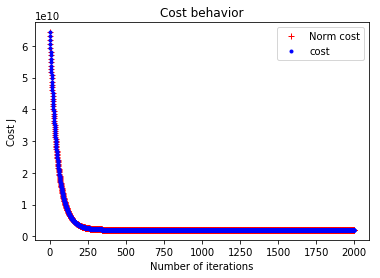

In [9]:

# Plot the convergence graph
plt.plot([i for i in range(num_iters)], j_history_norm, '+r', label = 'Norm cost')
plt.plot([i for i in range(num_iters)], j_history, '.b', label = 'cost')
plt.xlabel('Number of iterations') # Set the x−axis label
plt.ylabel('Cost J') # Set the y−axis label 
plt.title('Cost behavior')
plt.legend()
plt.show()

## Display gradient descent's result

In [10]:
print("Theta computed from gradient descent: \n{}".format(theta))

Theta computed from gradient descent: 
[[340412.65894002]
 [109439.22578243]
 [ -6569.78416695]]


# Normal equation

## Function

In [11]:
def normal_equation(x, y):
    return np.linalg.pinv(x.T.dot(x)).dot(x.T).dot(y)

## Use it

In [12]:
x_copy = np.concatenate([np.ones((m,1)), x], axis = 1)
theta = normal_equation(x_copy, y)
print(theta)
cost = compute_cost_vectorized(x_copy, y, theta)

[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


In [13]:
_x = np.array([1650, 3])
_x = np.array([1, (_x[0]-mu[0])/sigma[0], (_x[1]-mu[1])/sigma[1]])
print(_x)
print(_x.T.shape)
_x = _x.reshape((_x.shape[0], 1))

[ 1.         -0.44604386 -0.22609337]
(3,)


In [14]:
print("Predicted value: {}\n".format(theta.T.dot(_x)))

Predicted value: [[293081.4643349]]



## Modificare il dataset

possiamo scegliere un singolo range da analizzare (da 2 a 3 stanze, ecc...)
(dimensione da 500 a 4100)